<a href="https://www.kaggle.com/code/kamalapousajja/loan-prediction-decision-tree-random-forest?scriptVersionId=150992168" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loan Prediction 

~ Decision Tree & Random Forest Classification Model ~

For this project we will be exploring publicly available data from LendingClub.com.

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

**We will try to create a model that will help predict this.**

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Get the Data

loans = pd.read_csv('/kaggle/input/loan-data/loan_data.csv')

loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#Check the infomation of the data

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#Summarize of the statistical information

loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

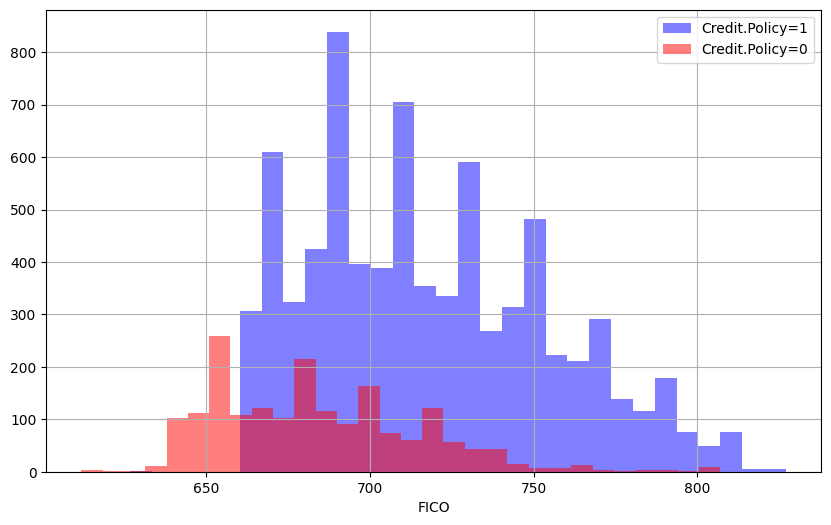

In [5]:
#Create a histogram of two FICO distributions on top of each other, one for each 'credit.policy' outcome.

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

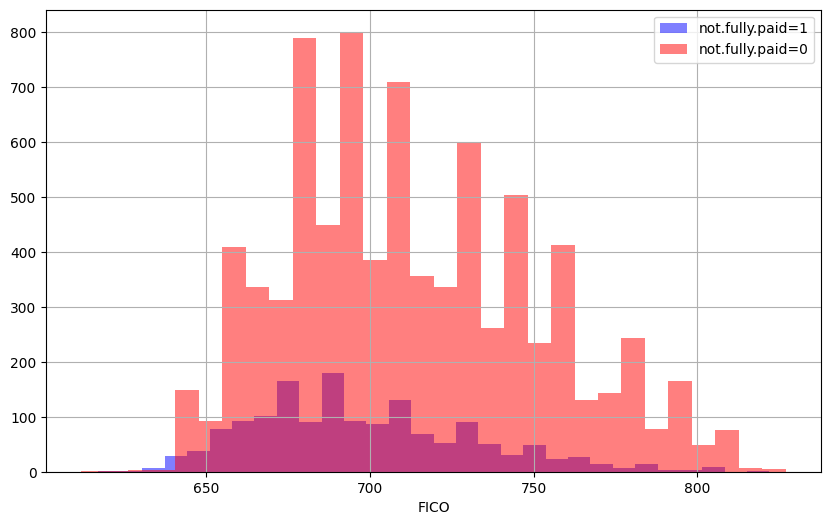

In [6]:
#Create a similar figure, except this time select by the 'not.fully.paid' column.

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')


<Axes: xlabel='purpose', ylabel='count'>

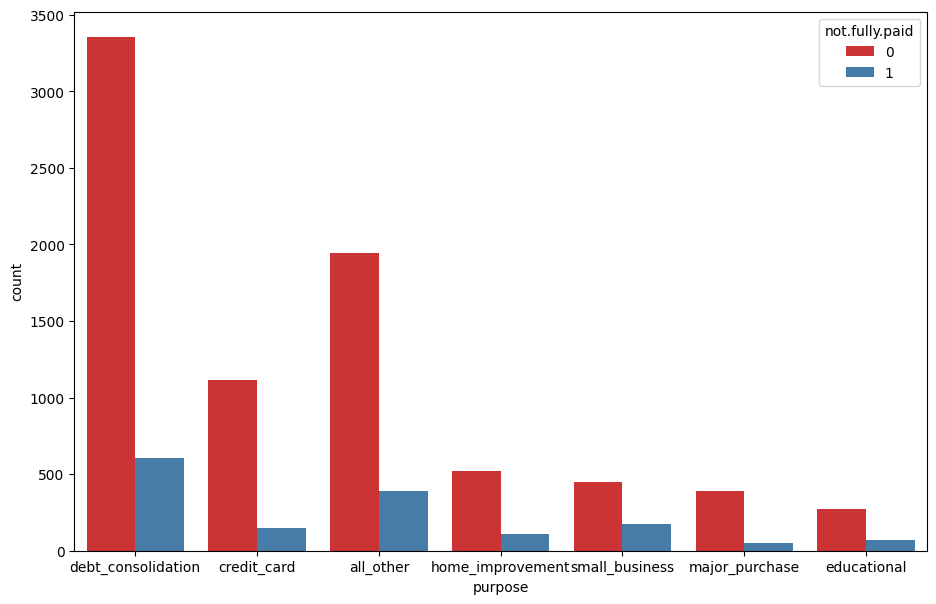

In [7]:
#Create a countplot using seaborn showing the counts of loans by 'purpose', with the color hue defined by 'not.fully.paid'.

plt.figure(figsize=(11,7))

sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

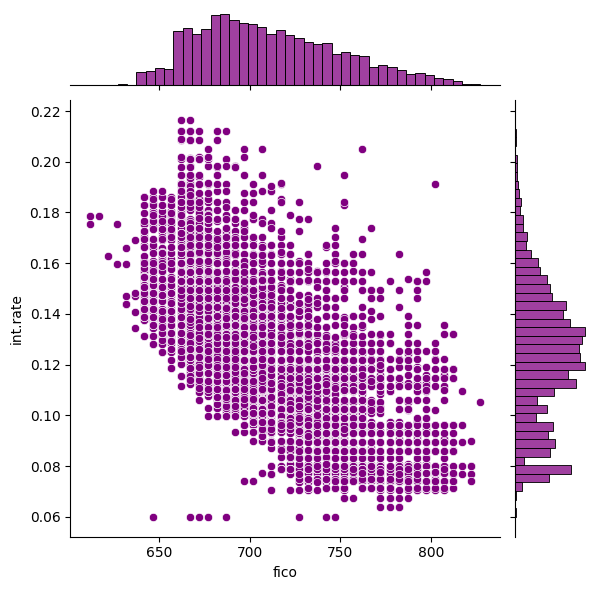

In [8]:
#Let's see the trend between FICO score and interest rate.
#Recreate the following jointplot.

sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

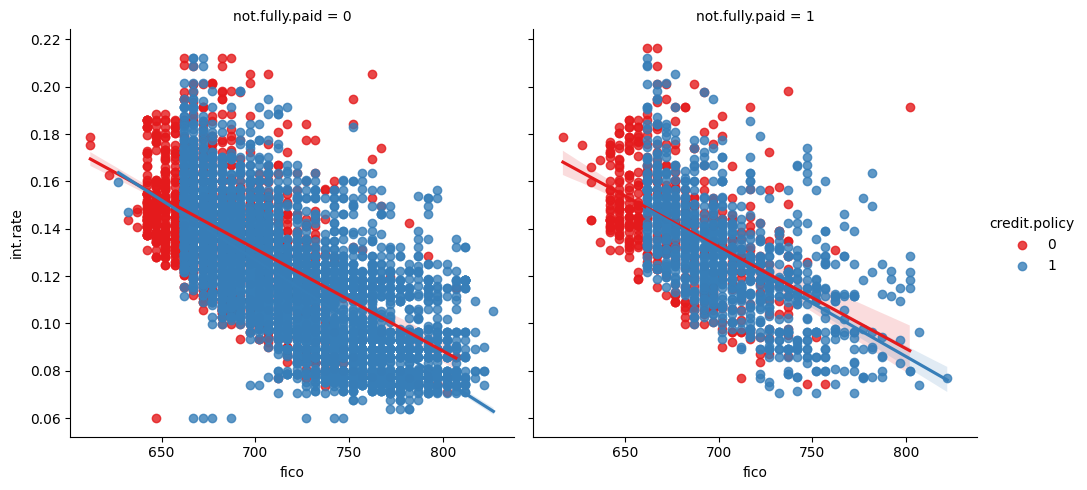

In [9]:
#Create the following lmplots to see if the trend differed between 'not.fully.paid' and 'credit.policy'.

plt.figure(figsize=(11,7))

sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model

In [10]:
#Check loans.info() again.

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Categorical Features

* Notice that the purpose column as categorical
 
* That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.
 
* Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.
 


In [11]:
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

cat_feats = ['purpose']

In [12]:
# Use pd.get_dummies to create a fixed larger dataframe that has new feature columns with dummy variables.

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [13]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [20]:
#Create predictions from the test set 

predictions = dtree.predict(X_test)

In [21]:
#Create a classification report

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [22]:
#Create a confusion matrix.

print(confusion_matrix(y_test,predictions))

[[1998  433]
 [ 340  103]]


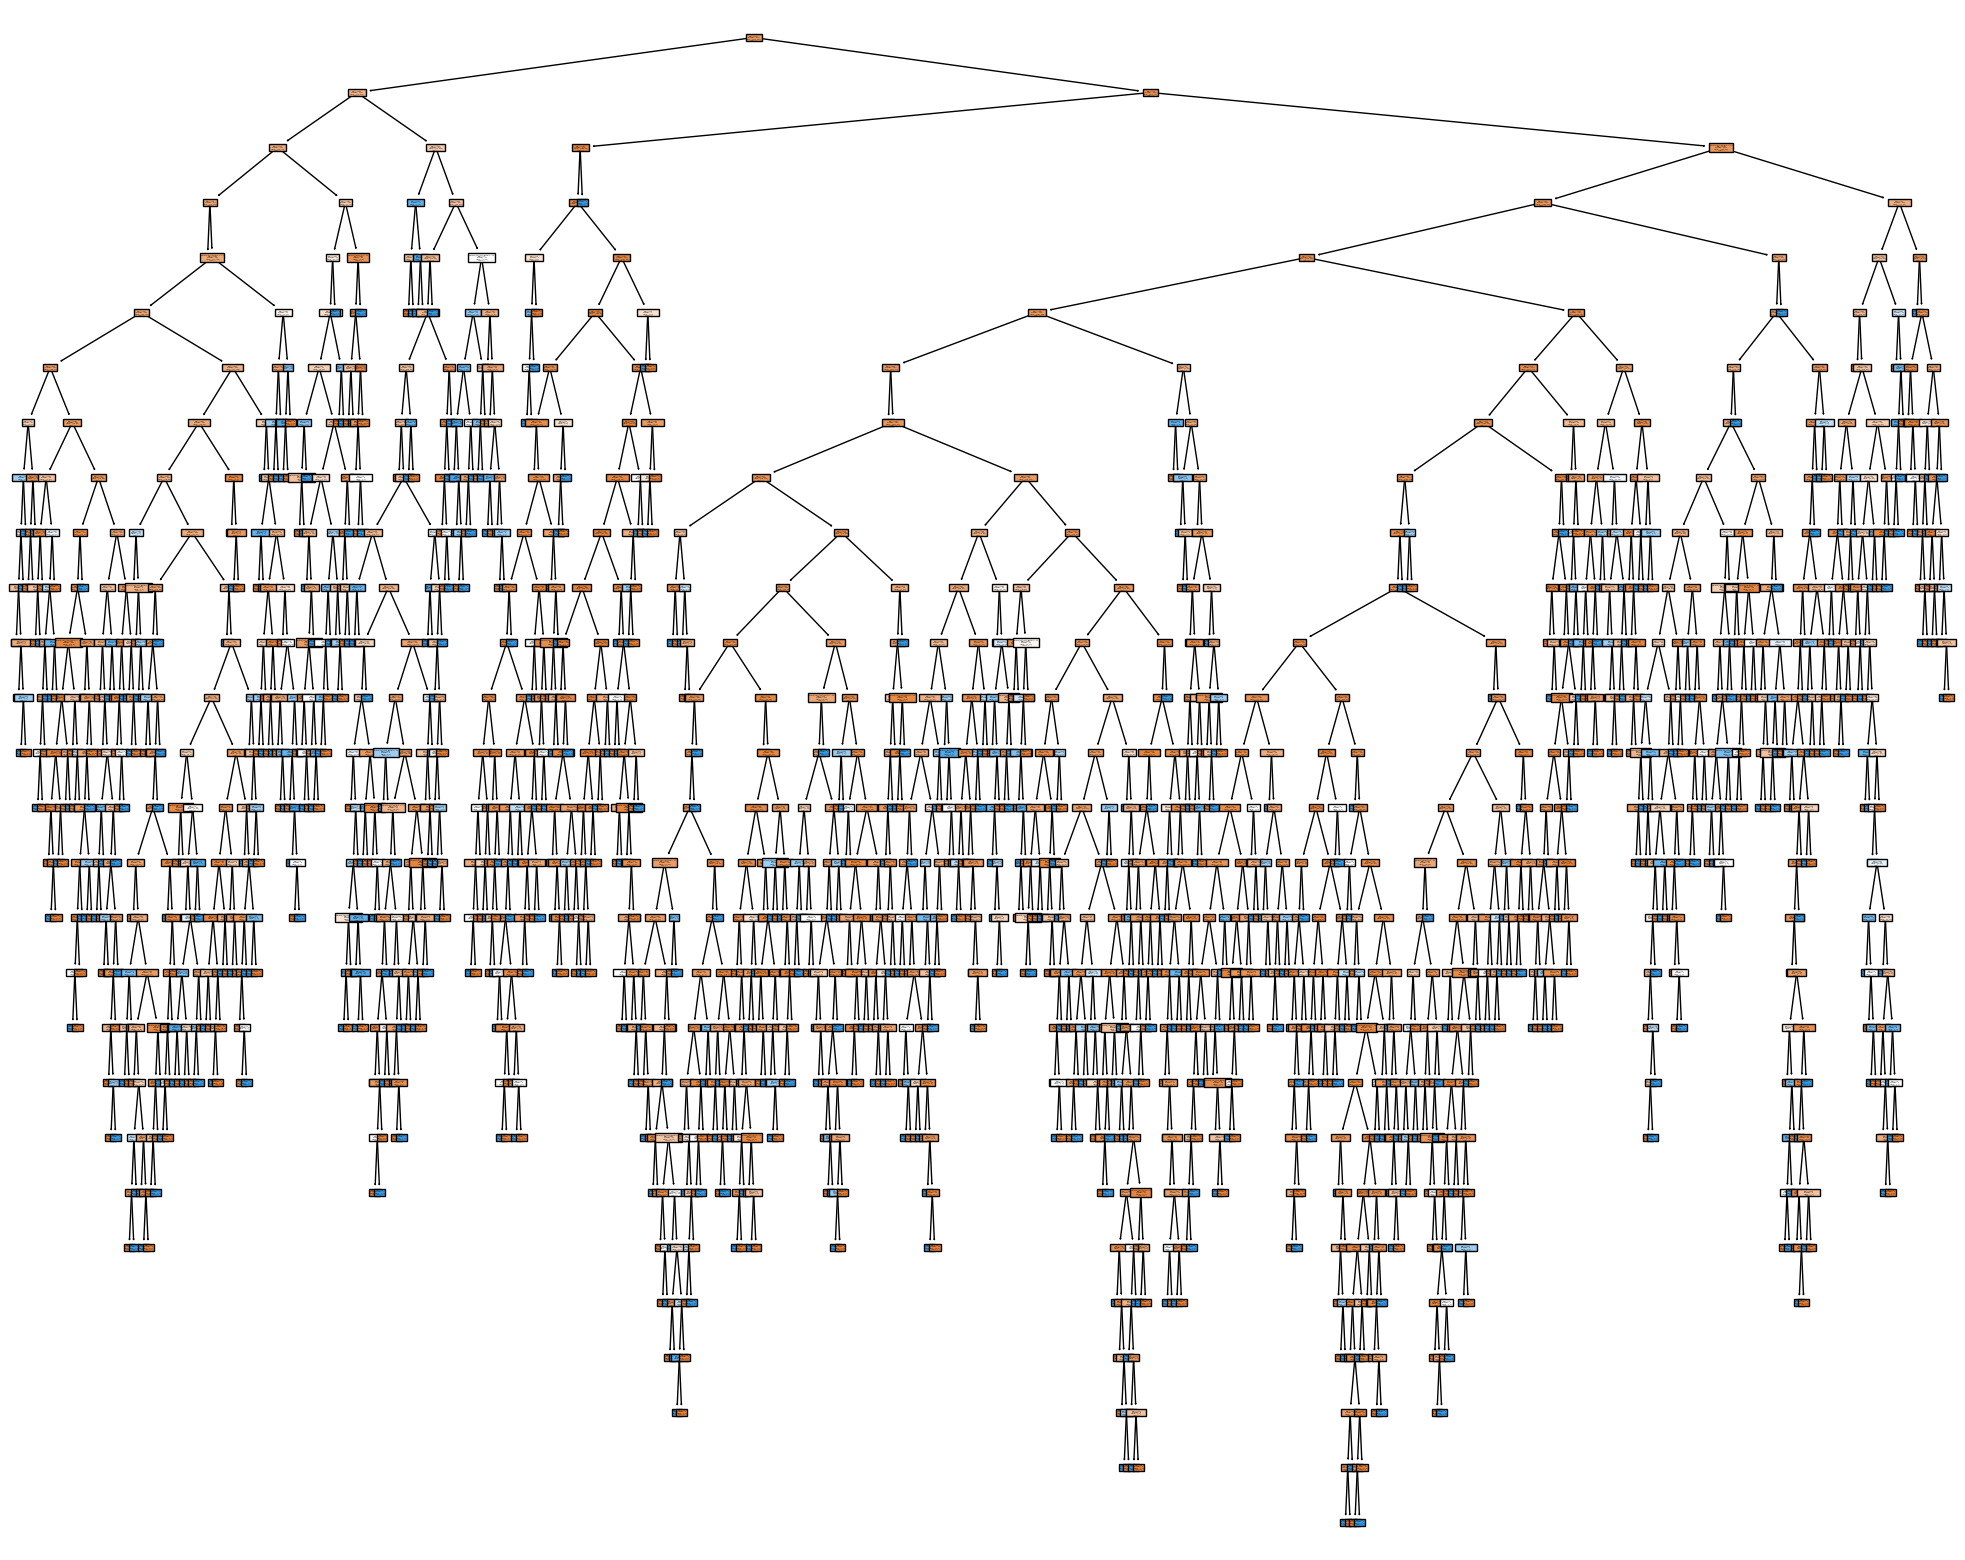

In [23]:
# Create Decision Tree Visualization

from sklearn import tree

feature_names = X_train.columns
target_names = ['0', '1']

fig = plt.figure(figsize=(25,20))

plot = tree.plot_tree(
    dtree,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

plt.show()

# for save tree plot
# fig.savefig('Tree.png')

# Training the Random Forest model

Now let's compare the decision tree to the random forest model.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions and Evaluation of Random Forest Model

In [26]:
#Predict the class of 'not.fully.paid' for the X_test data.

predictions = rfc.predict(X_test)

In [27]:
#Create a classification report from the results.

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.69      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



In [28]:
#Show the Confusion Matrix for the predictions.

print(confusion_matrix(y_test,predictions))

[[2427    4]
 [ 434    9]]


**What performed better the random forest or the decision tree?**

* Depends what metric you are trying to optimize for.

* Notice the recall for each class for the models. 

* Neither did very well, more feature engineering is needed.